# Obetivo
Fazer uma associação entre as ocorrencias de atropelamentos de animais divido por classes com os locais onde foram encontrados.

# Importando o CSV
Primeiramente vamos importar o CSV para o Notebook usando a Biblioteca do Python chamada Pandas.
Onde salvaremos esse CSV que foi exportado pelo banco de dados em SQL cedido em uma variavel chamada dados_combinados (dc).

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

dc = pd.read_csv('tblocorrencia.csv')
tbanimal = pd.read_csv('animal.csv')

Para visualizarmos se realmente foi salvo a base de dados vamos pedir para printar as primeiras linhas com os dados salvos dessa base.

In [2]:
dc.head()

,codOcorrencia,NumFormulario,IDAnimal,DataColeta,HoraColeta,Km,Sentido,Estaca,LocNorte,LocLeste,...,agua,vegetacaoBaixa,capimAlto,arbustos,floresta,codTipoLocal,comFilhotes,descrFilhotes,foto,observacoes
0,4,854/2014/NSS,NaN,2014-10-10,09:10:00,90,RJ,NaN,0681064,7505497,...,0,0,0,0,1,5,0,NaN,NaN,NaN
1,5,850/2014/NSS,NaN,2014-10-09,07:55:00,91,RJ,NaN,0680800,7505373,...,0,0,0,0,1,6,0,NaN,NaN,NaN
2,6,857/2014/NSS,NaN,2014-10-13,08:54:00,90,RJ,NaN,0681263,7505528,...,1,0,0,0,1,6,0,NaN,NaN,NaN
3,7,844/2014/NSS,NaN,2014-10-08,08:20:00,80,RJ,NaN,0682034,7510637,...,0,0,0,0,1,5,0,NaN,NaN,NaN
4,8,1224/2014/LO,NaN,2014-10-08,10:11:00,64,JF,NaN,0689628,7518797,...,1,0,0,0,1,5,0,NaN,NaN,NaN


In [3]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6691 entries, 0 to 6690
Data columns (total 43 columns):
codOcorrencia              6691 non-null int64
NumFormulario              6690 non-null object
IDAnimal                   1552 non-null object
DataColeta                 6691 non-null object
HoraColeta                 6691 non-null object
Km                         6690 non-null object
Sentido                    6691 non-null object
Estaca                     2959 non-null object
LocNorte                   6685 non-null object
LocLeste                   6685 non-null object
UTM                        6691 non-null object
NumPistas                  6691 non-null int64
NumFaixas                  6691 non-null int64
Velocidade                 6648 non-null object
codAnimal                  6691 non-null int64
codColetor                 6691 non-null int64
codMunicipio               6691 non-null int64
codTipoRegistro            6691 non-null int64
codTipoPavimento           6691 non-

# Limpando os dados
Diante de todos esses atributos nós excluiremos os que possui redundancia ou nenhuma correlação com nosso objetivo.

In [4]:
#dc = dc['Km','LocNorte','LocLeste','NumPistas','NumFaixas','codAnimal',
#        'codTipoPavimento','codTipoDivisaoPistas','codTipoChuva','codSituacaoAnimal',
#        'Intervencao','Vazamento','agua','vegetacaoBaixa','capimAlto','arbustos','floresta','codTipoLocal']
dc = dc.drop(['codOcorrencia','NumFormulario','DataColeta','HoraColeta','Sentido','Estaca','UTM',
                                          'descrIntervencao','descrVazamento','codTipoRegistro','descAtendidoVeterinario',
                                         'situacaoVeterinario','maturacao', 'codDestinacaoAnimal','codSexo','descSexoFemea',
                                         'descValorAmeacado','IDAnimal', 'Velocidade', 'codColetor', 'codMunicipio',
                                         'codSituacaoAnimal', 'NumPistas', 'NumFaixas', 'codTipoDivisaoPistas',
                                         'comFilhotes','descrFilhotes','foto','observacoes', 'LocNorte', 'LocLeste'], axis=1)

In [5]:
dc.head()

,Km,codAnimal,codTipoPavimento,codTipoChuva,Intervencao,Vazamento,agua,vegetacaoBaixa,capimAlto,arbustos,floresta,codTipoLocal
0,90,334,2,1,0,0,0,0,0,0,1,5
1,91,1,2,1,0,0,0,0,0,0,1,6
2,90,18,4,1,1,0,1,0,0,0,1,6
3,80,361,4,1,1,0,0,0,0,0,1,5
4,64,48,4,1,0,0,1,0,0,0,1,5


In [6]:
dc.count()

Km                  6690
codAnimal           6691
codTipoPavimento    6691
codTipoChuva        6691
Intervencao         6691
Vazamento           6691
agua                6691
vegetacaoBaixa      6691
capimAlto           6691
arbustos            6691
floresta            6691
codTipoLocal        6691
dtype: int64

# Corrigindo os dados
Agora corrigiremos alguns atributos que apresentarem um preenchimento incorreto. 

In [7]:
dc.groupby('Km').size()


Km
0        18
0,0      11
00        1
01        1
02        2
05        2
07        3
08        2
09        2
1        22
1,0      10
10       97
10,0     41
100      50
100,0    34
101      45
101,0    47
102      28
102,0    24
103      45
103,0    31
104       4
104,0     6
105       1
106       1
109,0     1
11       41
11,0     19
112       1
112,0     1
         ..
86,0     45
87       47
87,0     52
879       1
88       47
88,0     28
89       36
89,0     27
9        25
9,0      11
90       41
90,0     41
91       56
91,0     32
92       33
92,0     40
93       39
93,0     33
94       43
94,0     52
95       27
95,0     34
96       59
96,0     52
97       54
97,0     67
98       70
98,0     50
99       75
99,0     81
Length: 343, dtype: int64

No atributo Km podemos ver que esta preenchido com valores seguidos de ',' fazendo o Python o reconhecer como string.
O primeiro passo é remover essas virgulas e o que sucede-las, tranformando todo o atributo em int.

In [8]:
km = dc['Km'].str.replace('(,)\w', '').fillna(0).astype(int)

Devido a quantidade de Km, para melhor utilizarmos esse atributo devemos separar em faixas de Km, separando de 20 a 20 cada Km.


In [9]:
cat = []
fxkm = []
for i in range(len(km)):
    for j in range(0, 900, 20):
        if (km[i] >= j and km[i] < j+20):
            cat.insert(i, (j+20)//20)
            fxkm.insert(i, str(j)+'a'+str(j+20))
relkm = pd.DataFrame({'Categoria' : cat, 'FaixaKm' : fxkm, 'Km': km})

Agora teremos um novo data frame só para os Km e suas respectivas faixas.

In [10]:
relkm.head()

,Categoria,FaixaKm,Km
0,5,80a100,90
1,5,80a100,91
2,5,80a100,90
3,5,80a100,80
4,4,60a80,64


In [11]:
relkm.groupby('Categoria').size()

Categoria
1      932
2      740
3      694
4      867
5     1848
6      325
36       1
39     113
40     276
41     563
42     331
44       1
dtype: int64

Para diminuirmos mais ainda a quantidade de categorias faremos a seguinte relação.

In [12]:
relkm['Categoria'] = relkm['Categoria'].replace(36, 7).astype(int)
relkm['Categoria'] = relkm['Categoria'].replace(39, 7).astype(int)
relkm['Categoria'] = relkm['Categoria'].replace(40, 8).astype(int)
relkm['Categoria'] = relkm['Categoria'].replace(41, 9).astype(int)
relkm['Categoria'] = relkm['Categoria'].replace(42, 10).astype(int)
relkm['Categoria'] = relkm['Categoria'].replace(44, 10).astype(int)
dc['Km'] = relkm['Categoria']
relkm.groupby('Categoria').size()


Categoria
1      932
2      740
3      694
4      867
5     1848
6      325
7      114
8      276
9      563
10     332
dtype: int64

|Categoria|Km|
|---|---|
|1|0 a 20|
|2|20 a 40|
|3|40 a 60|
|4|60 a 80|
|5|80 a 60|
|6|100 a 120|
|7|120 a 140|
|8|140 a 160|
|9|160 a 180|
|10|180 a 200|

# Correlacionando atributos
Com o objetivo de associar os devidos animais com suas taxinomias faremos uma relação entre as especies de animais e seus devidos grupos taxonomicos vistos na tabela animal (tbanimal)

In [13]:
tbanimal.head(10)

,codAnimal,nomeComum,nomeCientifico,codGrupoTax,codValorBiologico
0,1,abre-asa-de-cabeça-cinza,Mionectes rufiventris,3,0
1,2,alcaide,Euphonia pectoralis,3,0
2,3,alegrinho,Serpophaga subcristata,3,0
3,4,alma-de-gato,Piaya cayana,3,0
4,5,andorinha,Pygochelidon melanoleuca,3,0
5,6,andorinha-de-casa,Notiochelidon cyanoleuca,3,0
6,7,andorinhão,Chaetura cinereiventris,3,0
7,8,andorinhão,Cypseloides fumigatus,3,0
8,9,andorinhão,Streptoprocne zonaris,3,0
9,10,andorinhão-de-coleira-falha,Streptoprocne biscutata,3,0


In [14]:
tax = []
nome = []
for i in range(len(dc)):
    for j in range(len(tbanimal)):
        if dc.codAnimal[i] == tbanimal.codAnimal[j]:
            tax.insert(i, tbanimal.codGrupoTax[j])
            nome.insert(i, tbanimal.nomeComum[j])
relanimal = pd.DataFrame({'Animal': dc['codAnimal'], 'Nome':nome, 'Taxonomia': tax})
relanimal.head()

,Animal,Nome,Taxonomia
0,334,tangar,3
1,1,abre-asa-de-cabeça-cinza,3
2,18,araçari-poca,3
3,361,caneleiro-preto,3
4,48,beija-flor-de-rabo-branco,3


In [15]:
dc['Taxonomia'] = relanimal['Taxonomia']

In [16]:
dc.rename(columns={'Km': 'FaixaKm', 'codTipoPavimento': 'TipoPavimento',
                  'codTipoChuva': 'TipoChuva', 'codTipoLocal': 'TipoLocal'}, inplace=True)
dc.head(10)

,FaixaKm,codAnimal,TipoPavimento,TipoChuva,Intervencao,Vazamento,agua,vegetacaoBaixa,capimAlto,arbustos,floresta,TipoLocal,Taxonomia
0,5,334,2,1,0,0,0,0,0,0,1,5,3
1,5,1,2,1,0,0,0,0,0,0,1,6,3
2,5,18,4,1,1,0,1,0,0,0,1,6,3
3,5,361,4,1,1,0,0,0,0,0,1,5,3
4,4,48,4,1,0,0,1,0,0,0,1,5,3
5,2,329,4,1,0,0,1,1,0,0,1,6,3
6,2,286,4,1,1,1,1,0,1,1,0,6,3
7,4,362,4,1,0,0,0,0,1,0,1,5,1
8,5,363,2,1,0,0,0,0,0,0,1,6,4
9,4,364,4,1,1,0,0,0,0,0,1,6,4


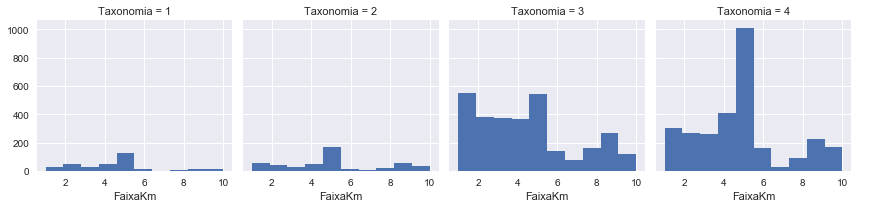

In [17]:
g = sns.FacetGrid(dc, col='Taxonomia')
g.map(plt.hist, 'FaixaKm', bins=10)
g.add_legend()

In [18]:
dc['Ave'] = (dc['Taxonomia'] == 3)*1
dc['Mamifero'] = (dc['Taxonomia'] == 4)*1
dc['Reptil'] = (dc['Taxonomia'] == 2)*1
dc['Anfibio'] = (dc['Taxonomia'] == 1)*1

In [22]:
dc.to_csv('dadoscorrigidos.csv', index=False)
dc.head()

,FaixaKm,codAnimal,TipoPavimento,TipoChuva,Intervencao,Vazamento,agua,vegetacaoBaixa,capimAlto,arbustos,floresta,TipoLocal,Taxonomia,Ave,Mamifero,Reptil,Anfibio
0,5,334,2,1,0,0,0,0,0,0,1,5,3,1,0,0,0
1,5,1,2,1,0,0,0,0,0,0,1,6,3,1,0,0,0
2,5,18,4,1,1,0,1,0,0,0,1,6,3,1,0,0,0
3,5,361,4,1,1,0,0,0,0,0,1,5,3,1,0,0,0
4,4,48,4,1,0,0,1,0,0,0,1,5,3,1,0,0,0
